# Diszkrét (ortogonális) wavelet transzformáció (DWT)

A folytonos wavelet transzformáció, amivel idáig foglalkoztunk, történetileg megelőzte a diszkrét wavelet transzformációt (**DWT**). Amíg a CWT főleg a jel *analízis*éhez hasznos, addig a DWT és a rá épülő **sokskálás analízis** (**MRA**) elsősorban a jel *feldolgozás*ához (rekonstrukció, szintézis) hasznos. 

Az $f(t)$ függvény $\psi_{m,n}(t)$ bázisfüggvényekkel történő felbontása ($m$: skála, $n$: eltolás)

$$f(t)=\sum\sum c_{mn} \psi_{mn}(t) $$

$$\psi_{mn}(t)=2^{-m/2} \psi(2^{-m}t-n) $$

esetében létezik olyan *teljes ortonormált* $\psi_{m,n}(t)$ *bázis*, melyre

$$c_{mn}=\int f(t)\psi_{m,n}(t) dt = \langle f, \psi_{m,n} \rangle.$$

### Hogyan konstruálhatók alkalmas $\psi_{m,n}$ bázisfüggvények?

A választ a sokskálás felbontás (MRA) adja meg:

Ha a $\psi_{m,n}(t)$ wavelet függvény beilleszthető egy MRA-ba, akkor a diadikus diszkretizációja ($a = 2^{-j}$, $b = 2^{-j} k$) elvezet a diszkrét wavelet transzformációhoz (DWT).

Ha viszont nincsen ilyen MRA az adott $\psi(t)$ wavelethez, akkor ez a diszkretizáció nem ad lehetőséget egyszerű rekonstrukcióra.

Az MRA szoros kapcsolatban van a szűrőcsoportokkal.

## Diszkrét Haar wavelet transzformáció

A Haar szűrő

$$ \mathbf{h} = \left( \frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2} \right)$$

$$ H(\omega) = \frac{\sqrt{2}}{2} + \frac{\sqrt{2}}{2} e^{i\omega}$$

voltaképpen a legegyszerűbb konvolúciós szűrő (amely két egymás utáni érték átlagát számolja ki, és aluláteresztő szűrő) ortogonális változata. A szűrt jelből az eredetit nem lehet visszaállítani. Mi szükséges ahhoz, hogy a szűrés megfordítható legyen?

Az egymás utáni értékek átlaga mellett a *különbségükre* is szükség van. A különbség képzés az alábbi (ortogonális) konvolúciós szűrést jelenti:

$$ \mathbf{g} = \left( \frac{\sqrt{2}}{2},-\frac{\sqrt{2}}{2} \right)$$

Ez a szűrő *felüláteresztő*. Így a $\mathbf{g}$, $\mathbf{h}$ szűrőpárral végzett szűrés megfordítható. Az inverzió redundáns, vagyis minden második érték elhagyható a szűrések után, és a jel még mindig visszaállítható marad. 

A $\mathbf{g}$, $\mathbf{h}$ szűrők ún. **kettős tükörszűrők** (**QMF**), és ezek definiálják a diszkrét **Haar wavelet transzformációt**.

## Sokskálás felbontás, MRA

Egy $L^2(R)$-ben adott jelet egymásba ágyazott $V_j$ alterekben fokozatosan közelítünk. Ezeket az altereket egyetlen $\varphi(t)$ **skálázó függvény** eltolt és átskálázott változatai generálják.

## Közelítés, tömörítés

Egy tipikus jel esetében a szomszédos minták erősen korreláltak.
Ez esetben a felüláteresztő $\mathbf{g}$ szűrő eredményeként előálló wavelet együtthatók kicsik lesznek és nagy részük sok esetben el is hagyható.

Kézenfekvő alkalmazás teljesen kitöltött mátrixú egyenletrendszerek megoldása wavelet prekondicionálással, vagy integrál operátorok közelítése.

## Kép tömörítés

Jellegzetes alkalmazása a DWT-nek és az MRA-nak a képek felbontása majd tömörítése. Ebből a célból kétfajta waveletet fogunk alkalmazni és összehasonlítani: a Haar és a Daubechies2 waveletet.

### Haar waveletek

Az Alfred Haar-ról elnevezett Haar waveletek elemző és skálázó függvényei igen egyszerűek. Az elemző wavelet két érték különbségét, a skálázó függvény két érték átlagát számolja ki.

Írjuk meg az elemzéshez és rekonstrukcióhoz szükséges Python eljárásokat!

In [1]:
## Haar wavelet transzformáció
## v mátrix is lehet, ekkor mindegyik sorát transzformáljuk
def haar1(v):
    n=v.shape[1]
    i=n
    while i>1:
        av=(v[:,:i:2]+v[:,1:i:2])/2.0
        dv=v[:,:i:2]-av
        v[:,:i]=np.hstack((av,dv))
        i=i/2
    return v

## sorok majd oszlopok transzformálása: 2D Haar WT
def haar2(X):
    a = np.copy(X)
    a = haar1(a).T
    return haar1(a).T


## inverz Haar wavelet transzformáció
def invhaar1(v):
    n=v.shape[1]
    i=2
    while i<=n:
        av=np.copy(v[:,0:i/2])
        dv=np.copy(v[:,i/2:i])
        v[:,:i:2]=av+dv
        v[:,1:i:2]=av-dv
        i=2*i
    return v

def invhaar2(X):
    a = np.copy(X)
    a = invhaar1(a).T
    return invhaar1(a).T

Először is nézzük meg, hogyan néz ki a Haar elemző wavelet.

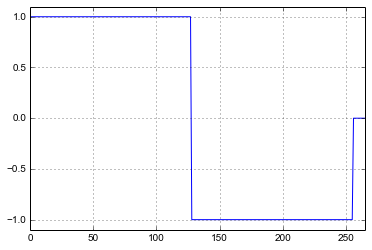

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
v=np.zeros((2,1024))
v[:,4]=1
iv=invhaar1(v)
plt.plot(iv[1,:])
plt.grid()
plt.xlim([0,265])
plt.ylim([-1.1,1.1])
plt.show()

A képfeldolgozásban sztenderdnek számító Léna tesztképet elemezzük. Először beolvassuk a tesztképet:

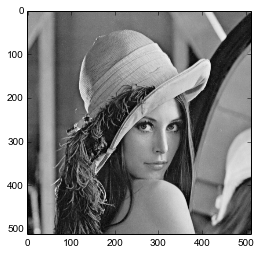

In [3]:
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('lena.png')
l = rgb2gray(img)
plt.imshow(l, cmap = plt.get_cmap('gray'))
plt.show()

Elvégezzük a kép Haar DWT elemzését a már megírt függvényekkel, vagyis kiszámítjuk a diszkrét wavelet együtthatók mátrixát. Ennek hamisszínes ábráját fel is rajzoljuk:

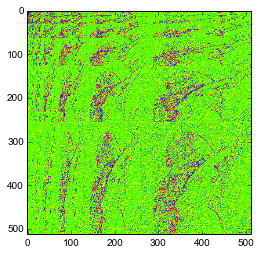

In [4]:
lh = haar2(l)
plt.imshow(lh, cmap = plt.get_cmap('prism'))
plt.show()

A kapott wavelet felbontás tömbjének jobb alsó sarkában van az első részlet jel, míg a bal felső pixelben az utolsó átlag jel, vagyis az elemzett jel átlaga (egyetlen szám) található.

Először is ellenőrizzük, hogy az inverz transzformációval valóban visszakapjuk-e az eredeti képet?

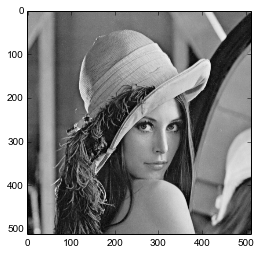

In [5]:
l2 = invhaar2(lh)
plt.imshow(l2, cmap = plt.get_cmap('gray'))
plt.show()

In [6]:
print "relatív eltérés: %5.3e" % (np.std(l-l2)/np.std(l))

relatív eltérés: 1.902e-16


### Kép tömörítés Haar waveletekkel

A kép tömörítéséhez töröljük ki a kapott wavelet transzformált tömb adott küszöbértéknél kisebb elemeit és nézzük meg a nemzérus elemek százalékos arányát.

Először nézzük meg az eredeti nemzérus elemek százalékos arányát!

In [7]:
print "nemzérus elemek: %4.2f%%" % (
    100.0*np.count_nonzero(lh)/np.product(lh.shape))

nemzérus elemek: 96.22%


Végezzük el a küszöbérték alatti együtthatók kinullázását egy új tömbben:

In [8]:
lht = np.copy(lh)
thr = 0.03*np.amax(np.abs(lh)) # küszöbszám a maximumhoz viszonyítva
idx = np.abs(lht) < thr
lht[idx] = 0.0

print "nemzérus elemek: %4.2f%%" % (
    100.0*np.count_nonzero(lht)/np.product(lht.shape))

nemzérus elemek: 8.25%


A tömörített DWT transzformált segítségével rekonstruáljuk a képet:

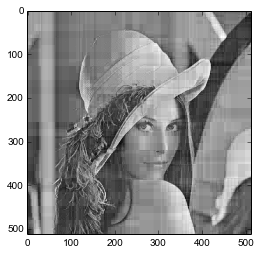

In [9]:
l2t = invhaar2(lht)
lhwt = np.copy(l2t) # a további összehasonlításhoz elmentjük
plt.imshow(l2t, cmap = plt.get_cmap('gray'))
plt.show()

A rekonstrukció elég jónak mondható, mert a kép részletei megmaradtak, bár a szemnek zavaró "blokkosodás" látható, amely a Haar wavelet alakjának köszönhető.

Sokkal jobb minőséget érhetünk el fejlettebb elemző waveletek alkalmazásával. Ezek közül az egyik legegyszerűbbet, a Daubechies2 waveletet fogjuk alkalmazni.

## Daubechies wavelet

Az Ingrid Daubechies matematikus asszonyról elnevezett waveletek alkalmazásához először is írjuk meg az elemzéshez és rekonstrukcióhoz szükséges Python eljárásokat!

In [10]:
## szűrő együtthatók számítása, Daubechies2 wavelet
def daubechies2():
    c = (np.array([1,3,3,1])+np.sqrt(3.0)*np.array([1,1,-1,-1]))/4.0/np.sqrt(2.0)
    return c

## 1D Daubechies2 wavelet transzformáció
def daub1(v):
    n=v.shape[1]
    i=n
    c=daubechies2()
    while i>2:
        ov1=range(2,i,2)
        ov1.append(0)
        ev2=range(3,i,2)
        ev2.append(1)
        av=(c[0]*v[:,:i:2]+c[1]*v[:,1:i:2]+c[2]*v[:,ov1]+c[3]*v[:,ev2])
        dv=(c[3]*v[:,:i:2]-c[2]*v[:,1:i:2]+c[1]*v[:,ov1]-c[0]*v[:,ev2])
        v[:,:i]=np.hstack((av,dv))
        i=i/2
    return v

## 2D Daubechies2 wavelet transzformáció
def daub2(X):
    a = np.copy(X)
    a = daub1(a).T
    return daub1(a).T

## inverz 1D Daubechies2 wavelet transzformáció
def invdaub1(v):
    n=v.shape[1]
    i=4
    c=daubechies2()
    while i<=n:
        ivx=range(0,i/2-1)
        iv1=[i/2-1]
        iv1=iv1+ivx
        av=np.copy(v[:,0:i/2])
        dv=np.copy(v[:,i/2:i])
        v[:,:i:2]=c[0]*av+c[2]*av[:,iv1]+c[3]*dv+c[1]*dv[:,iv1]
        v[:,1:i:2]=c[1]*av+c[3]*av[:,iv1]-c[2]*dv-c[0]*dv[:,iv1]
        i=2*i
    return v

## inverz 2D Daubechies2 wavelet transzformáció
def invdaub2(X):
    a = np.copy(X)
    a = invdaub1(a).T
    return invdaub1(a).T


Most is nézzük meg, hogyan néz ki a Daubechies2 elemző wavelet.

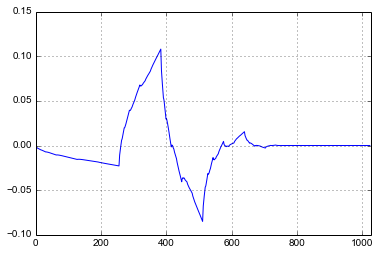

In [11]:
v=np.zeros((2,1024))
v[:,4]=1
iv=invdaub1(v)
plt.plot(iv[1,:])
plt.grid()
plt.xlim([0,1025])
plt.show()

Elvégezzük a kép Daubechies2 DWT elemzését a már megírt függvényekkel, kiszámítjuk a diszkrét wavelet együtthatók mátrixát.

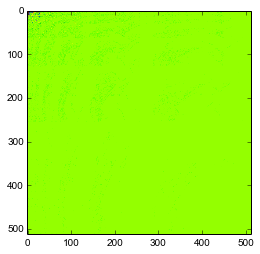

In [12]:
lh = daub2(l)
plt.imshow(lh, cmap = plt.get_cmap('prism'))
plt.show()

A kép így nem sokat mutat! Próbáljuk meg a logaritmikus normalizációt és az abszolút értéket.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


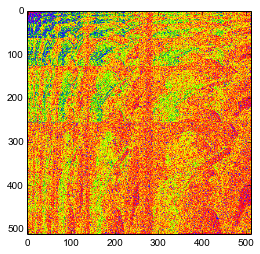

In [13]:
plt.imshow(np.log(abs(lh)), cmap = plt.get_cmap('prism'))
plt.show()

Megint ellenőrizzük az inverz transzformációt.

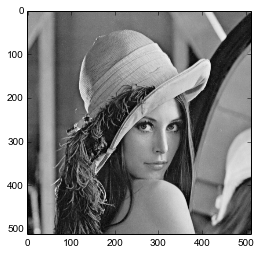

relatív eltérés: 4.229e-15


In [14]:
l2 = invdaub2(lh)
plt.imshow(l2, cmap = plt.get_cmap('gray'))
plt.show()
print "relatív eltérés: %5.3e" % (np.std(l-l2)/np.std(l))

Végezzük el a küszöbérték alatti együtthatók kinullázását egy új tömbben, és a tömörítés utáni rekonstrukciót.

nemzérus elemek: 0.91%


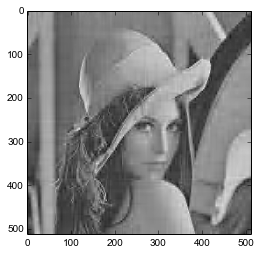

In [15]:
lht = np.copy(lh)
thr = 0.003*np.amax(np.abs(lh)) # küszöbszám a maximumhoz viszonyítva
idx = np.abs(lht) < thr
lht[idx] = 0.0
print "nemzérus elemek: %4.2f%%" % (
    100.0*np.count_nonzero(lht)/np.product(lht.shape))

l2t = invdaub2(lht)
plt.imshow(l2t, cmap = plt.get_cmap('gray'))
plt.show()

A tömörítési arány 1:100-hoz, és a lényeges információk még mindig megvannak. Nézzük meg milyen lesz a kép minősége 8.2% nemzérus elem megtartása mellett, és hasonlítsuk össze a korábbi Haar wavelet-es tömörítés eredményével, ugyanilyen, 8.25%-os tömörítési arány mellett.

nemzérus elemek: 8.20%


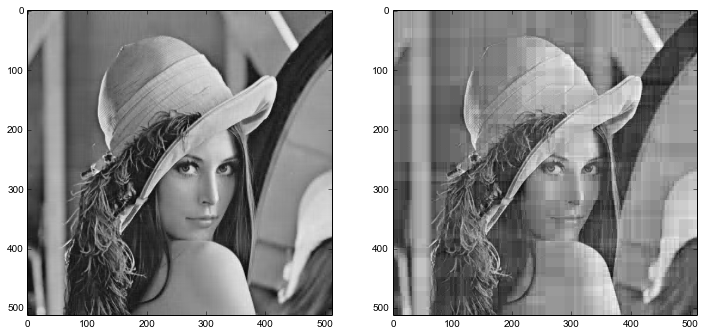

In [16]:
lht = np.copy(lh)
thr = 0.00044*np.amax(np.abs(lh)) # küszöbszám a maximumhoz viszonyítva
idx = np.abs(lht) < thr
lht[idx] = 0.0
print "nemzérus elemek: %4.2f%%" % (
    100.0*np.count_nonzero(lht)/np.product(lht.shape))

l2t = invdaub2(lht)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(l2t, cmap = plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(lhwt, cmap = plt.get_cmap('gray'))
plt.show()

A tömörítési arány tehát ugyanaz, de a Daubechies2 wavelet mégis sokkal jobb eredményt szolgáltatott. Számszerűsíthetjük mindezt a [jel-zaj viszony](https://en.wikipedia.org/wiki/Signal-to-noise_ratio_%28imaging%29) kiszámításával.

In [17]:
def SNR(img,ref):
    return 20.0*np.log10(np.std(ref)/np.std(img-ref))

print "Haar  wavelet SNR: %6.2f dB" % SNR(lhwt,l)
print "Daub2 wavelet SNR: %6.2f dB" % SNR(l2t,l)

Haar  wavelet SNR:  11.94 dB
Daub2 wavelet SNR:  21.57 dB
